In [1]:
import json
import math
import itertools
from collections import defaultdict, Counter
import numpy as np
from scipy.stats import spearmanr, shapiro, mannwhitneyu
from sklearn.cluster import SpectralClustering
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
%matplotlib inline

In [2]:
def build_graph(start_year, end_year):  
    if(end_year == -1):
        # Load data
        artists_dict = json.load(open(f"data/artists_{start_year}.json", "r"))
        related_dict = json.load(open(f"data/related_{start_year}.json", "r"))

        # Build graph
        G = nx.Graph()
        for artist, related in related_dict.items():
            for next_artist in related:
                G.add_edge(artist, next_artist)
    else:
        # Load data
        artists_dict = {}
        artist_id_set = set()
        related_dict = {}
        for year in range(start_year, end_year+1):
            #dictionary {key: {artist information}}
            year_artist_dict = json.load(open(f"data/artists_{year}.json", "r")) 
            for year_artist in year_artist_dict.keys():
                #check if artist id is currently in the set...
                year_artist_id = year_artist_dict[year_artist]["artist_id"]
                if year_artist_id not in artist_id_set:
                    artist_id_set.add(year_artist_id)
                    #right now I keep the earliest information of a repeating artist -- should I be updating it to be the latest -- that would be complicated...
                    artists_dict[year_artist]=year_artist_dict[year_artist] 

            #dictionary {artist id: {list of related artist ids}}
            year_related_dict = json.load(open(f"data/related_{year}.json", "r")) 
            for year_related_id in year_related_dict.keys():
                if year_related_id not in related_dict:
                    # add new key value pair to related_dict
                    related_dict[year_related_id]=year_related_dict[year_related_id]
                else:
                    # update the values for the key in related_dict
                    related_dict[year_related_id]=list(set(related_dict[year_related_id]+year_related_dict[year_related_id]))
        # Build graph
        G = nx.Graph()
        for artist, related in related_dict.items():
            for next_artist in related:
                G.add_edge(artist, next_artist)

    return G, artists_dict

In [3]:
# Partition graph
def partition_graph(n, graph):
    comp = nx.community.girvan_newman(graph)
    limited = itertools.takewhile(lambda c: len(c) <= n, comp)
    return list(limited)[-1]

In [4]:
#Get most common genre in partition
def get_name(node_list, artists_dict, idf):
    counts = defaultdict(int)
    for node in node_list:
        genres = artists_dict[node]["genres"]
        for genre in genres:
            counts[genre.replace(" ", "_")] += 1
    tf_idf = {k: v * idf[k] for k, v in counts.items()}
    return max(tf_idf, key=tf_idf.get)

In [5]:
# Generate colors and labels for graph
def graph_fav_artist(G, communities, cluster_labels):
    colors = []
    for node in G.nodes():
        for i in range(len(communities)):
            if node in communities[i]:
                colors.append(i)
    
    # Draw graph
    fig, ax = plt.subplots(figsize=(15,15))
    cm = plt.colormaps["tab20"]
    color_map = cm(range(len(communities)+1))
    pos=nx.spring_layout(G)
    for i, cluster in enumerate(communities):
        nx.draw_networkx_nodes(G, pos=pos, node_size=10, nodelist=cluster, ax=ax, node_color=[color_map[i+1]], 
                            linewidths=0.1, edgecolors='k', label=cluster_labels[i])
    nx.draw_networkx_edges(G, pos=pos, ax=ax, edge_color="#929591", width=0.5)
    ax.axis("off")
    fig.set_facecolor('k')
    lgnd = ax.legend(scatterpoints=1)
    for handle in lgnd.legend_handles:
        handle.set_sizes([20.0])
    plt.show()

Graph for year 2013
Number of nodes:  101
Number of edges:  150
Connected components:  2
Average clustering coefficient:  0.26118540425471126
Capital Cities indietronica
will.i.am dance pop
X Ambassadors folk-pop
Donell Jones contemporary r&b
Avicii edm
Hoodie Allen indie pop rap
Panic! At The Disco pop punk
Linkin Park alternative metal
Ed Sheeran post-teen pop
Hucci electronic trap


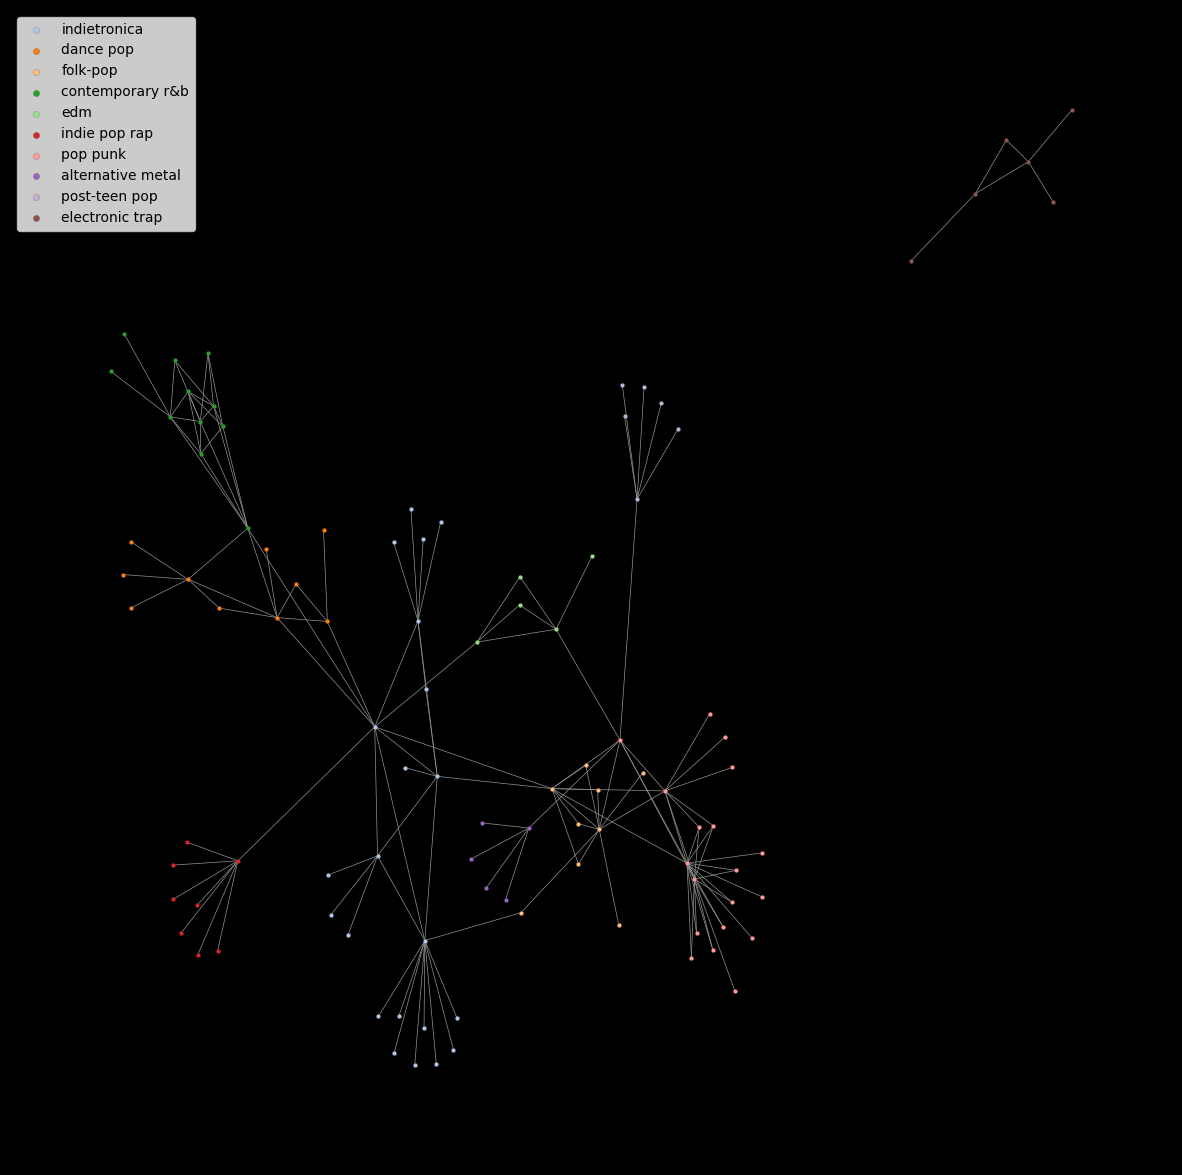

-----------------------------
Graph for year 2014
Number of nodes:  100
Number of edges:  169
Connected components:  1
Average clustering coefficient:  0.15947252747252746
Kelis dirty south rap
Whitney Houston contemporary r&b
Common conscious hip hop
Jennifer Lopez rap
Cher Lloyd post-teen pop
Train pop rock
Tove Lo escape room
Tinashe r&b
Bastille folk-pop
Imagine Dragons edm


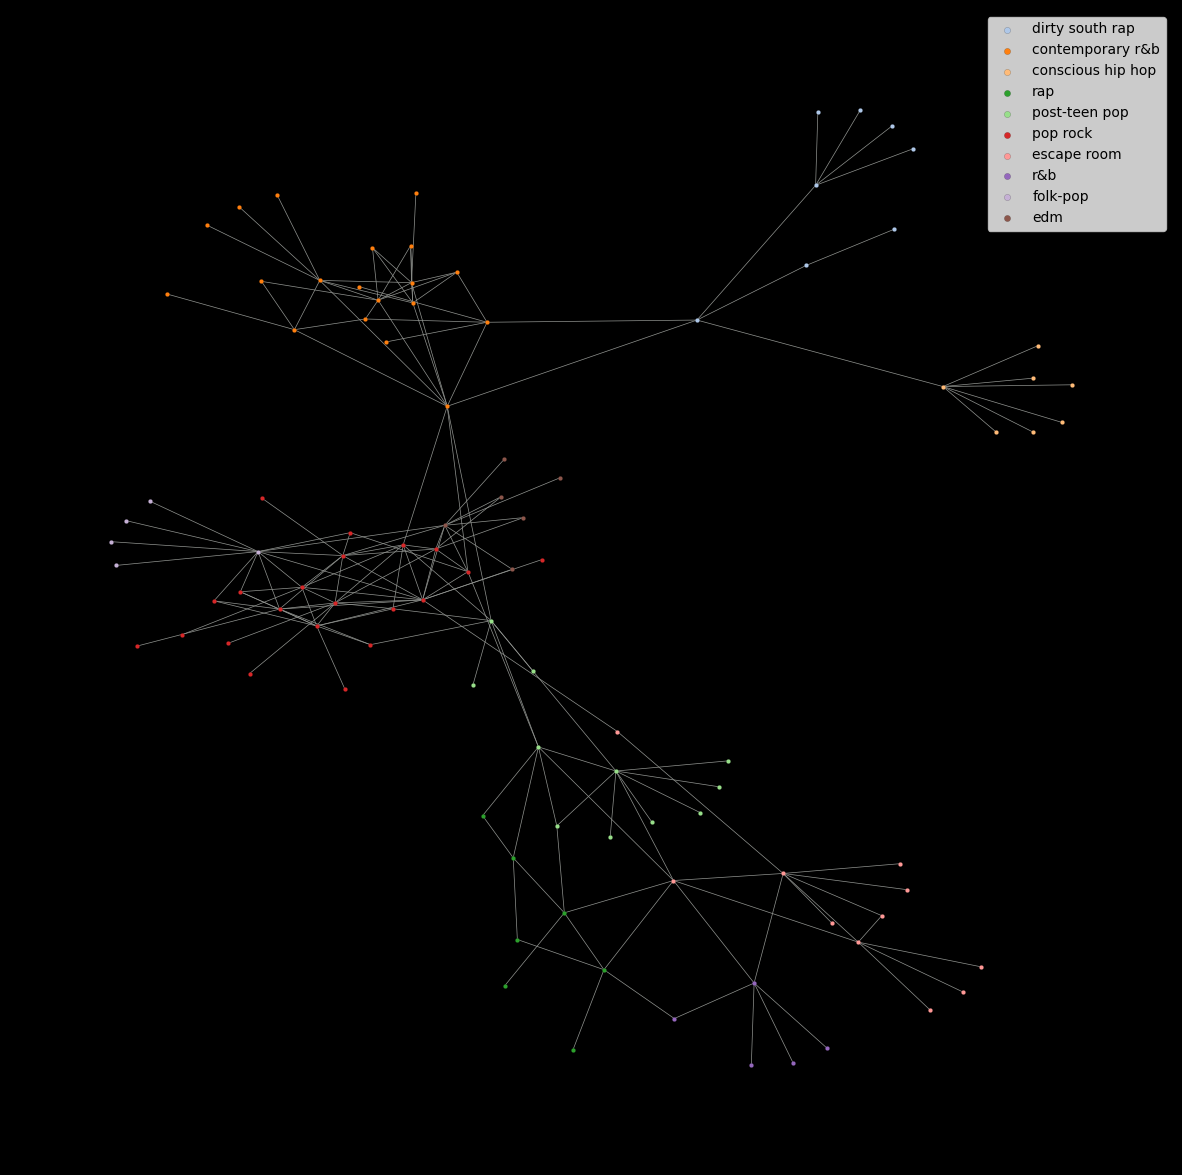

-----------------------------
Graph for year 2015
Number of nodes:  104
Number of edges:  269
Connected components:  2
Average clustering coefficient:  0.41649362956445
Olly Alexander (Years & Years) pop dance
Basement Jaxx big beat
CeeLo Green pop rap
Sam Smith pop
Juicy J southern hip hop
PnB Rock melodic rap
Paul Wall chopped and screwed
Gorilla Zoe futuristic swag
Jay Rock conscious hip hop
Young Thug atl trap


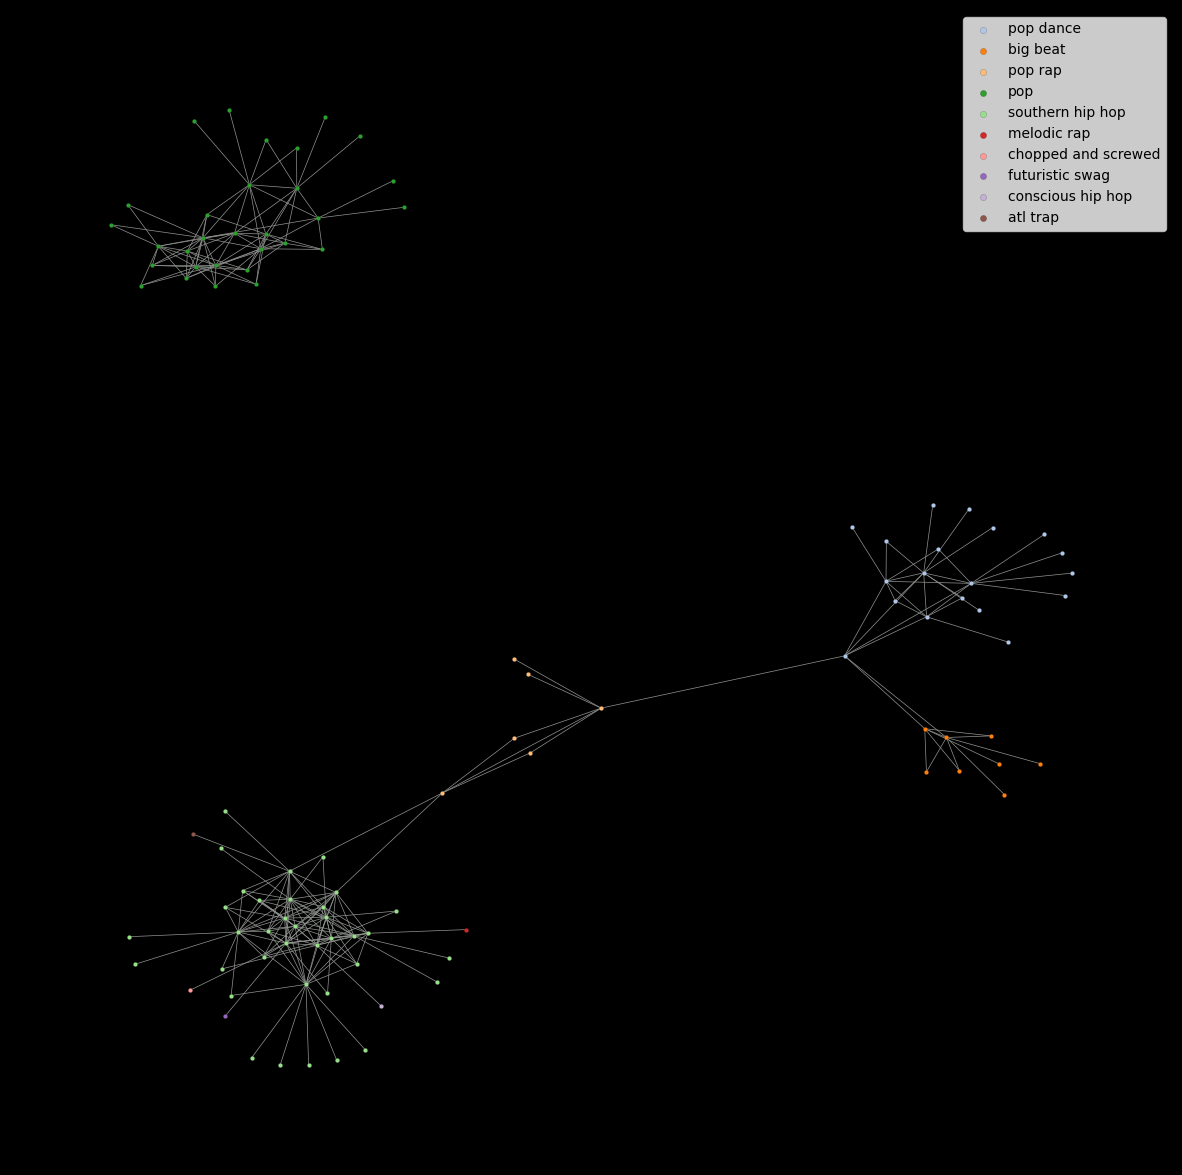

-----------------------------
Graph for year 2016
Number of nodes:  102
Number of edges:  244
Connected components:  2
Average clustering coefficient:  0.37334042376612037
Fifth Harmony pop
Future hip hop
DJ Khaled southern hip hop
PARTYNEXTDOOR canadian contemporary r&b
Lady Gaga pop
Cardi B dancehall
USHER contemporary r&b
Twenty One Pilots modern rock
Panic! At The Disco pop punk
Desiigner viral trap


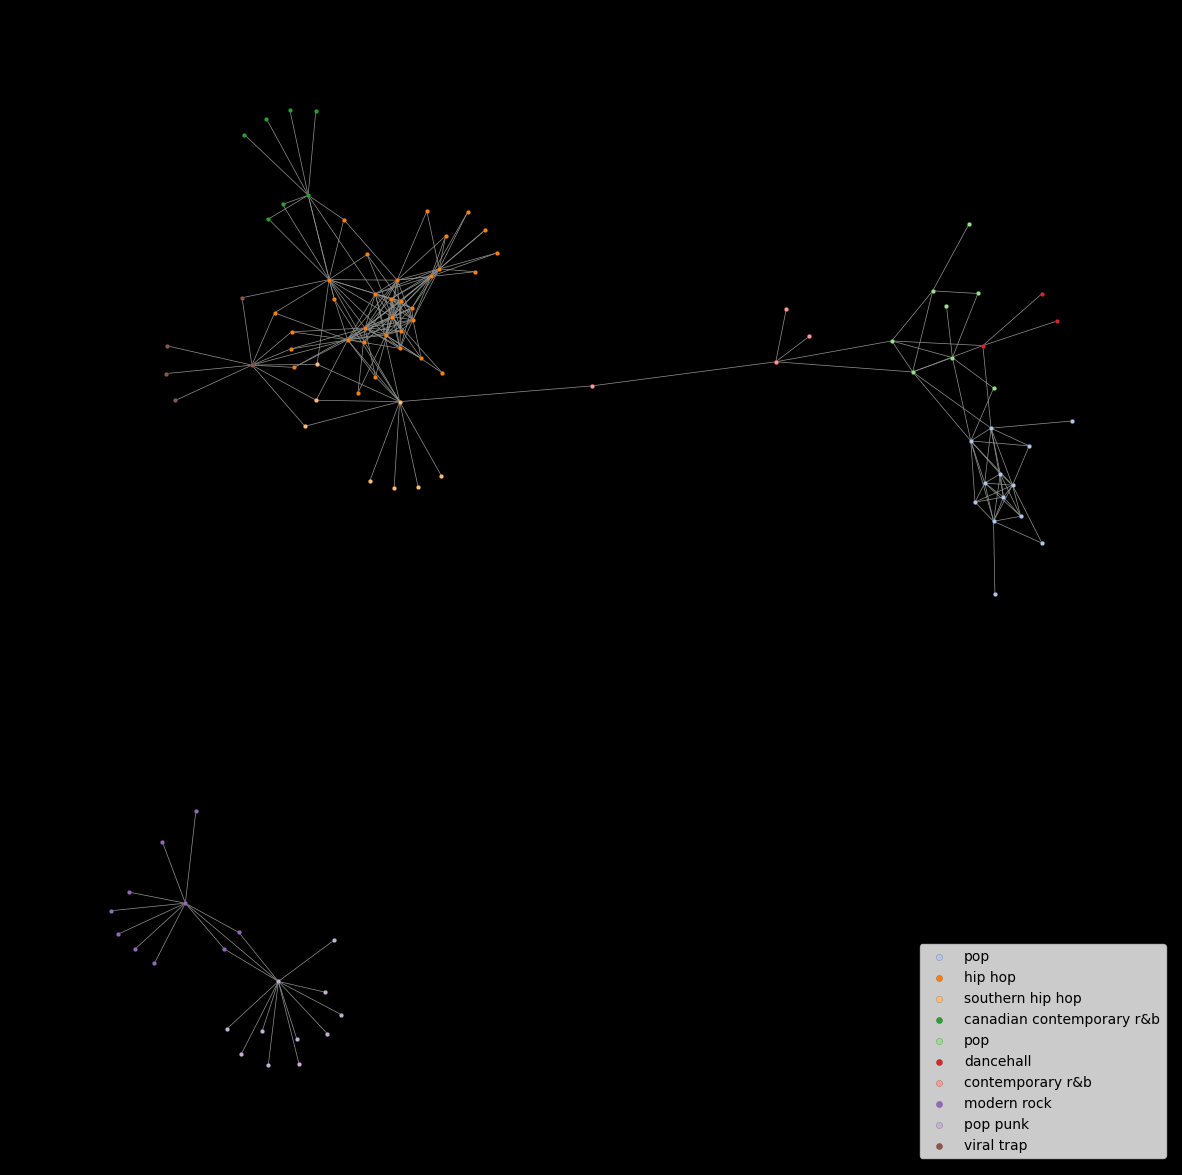

-----------------------------
Graph for year 2017
Number of nodes:  104
Number of edges:  207
Connected components:  3
Average clustering coefficient:  0.3568572031881748
Shawn Mendes pop
The Chainsmokers edm
P!nk dance pop
Sin Bandera latin arena pop
Carlos Vives vallenato
Ricardo Montaner latin pop
Future rap
Joey Bada$$ rap
JAY-Z east coast hip hop
Big Sean detroit hip hop


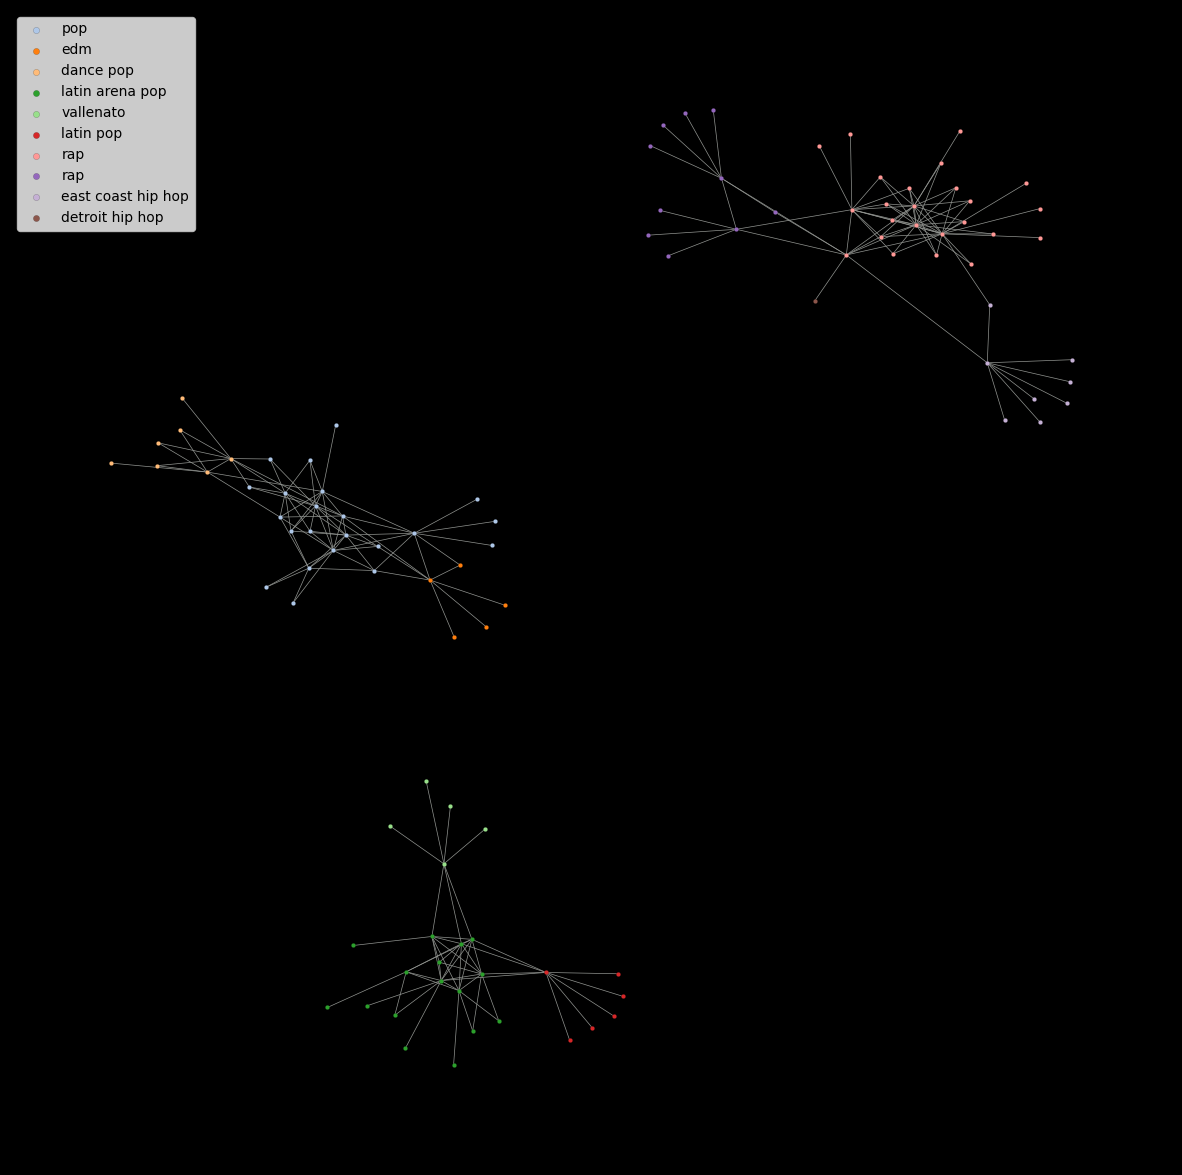

-----------------------------
Graph for year 2018
Number of nodes:  100
Number of edges:  297
Connected components:  2
Average clustering coefficient:  0.4161869560451066
Young Thug atl hip hop
Imagine Dragons pop
Post Malone pop
MF DOOM instrumental hip hop
Rod Wave florida rap
YNW Melly melodic rap
Key Glock memphis hip hop
Pusha T virginia hip hop
Denzel Curry dark trap
Earl Sweatshirt drumless hip hop


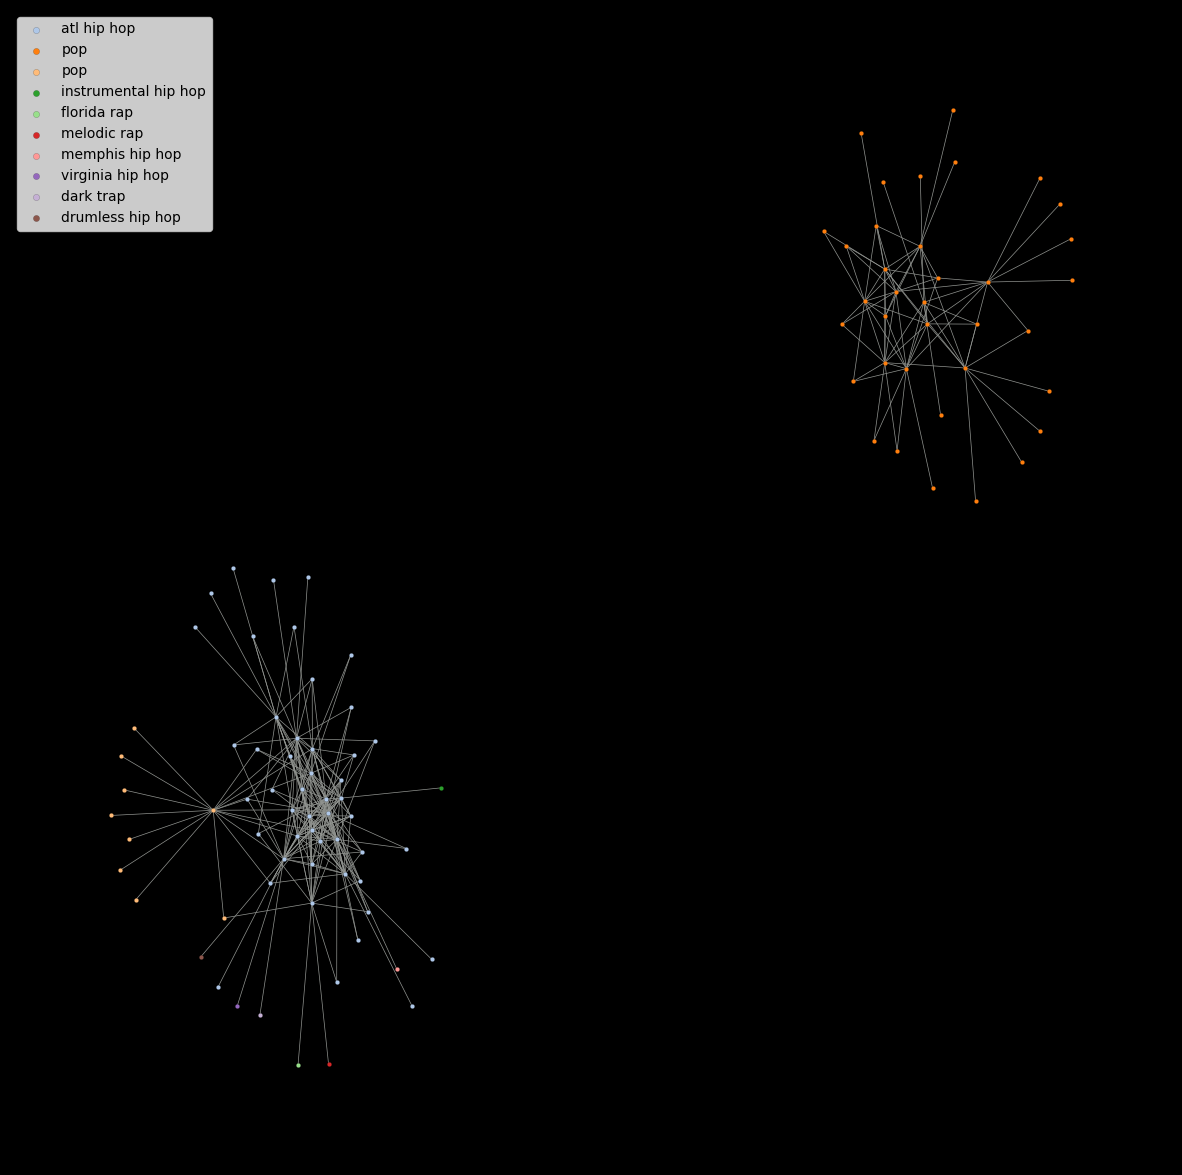

-----------------------------
Graph for year 2019
Number of nodes:  101
Number of edges:  185
Connected components:  1
Average clustering coefficient:  0.19783795904171103
DaBaby melodic rap
Lizzo trap queen
Jack Harlow hip hop
blackbear indie pop rap
Khalid edm
WILLOW afrofuturism
Lil Pump trap
Billie Eilish pop
Tyla Yaweh cali rap
Mustard southern hip hop


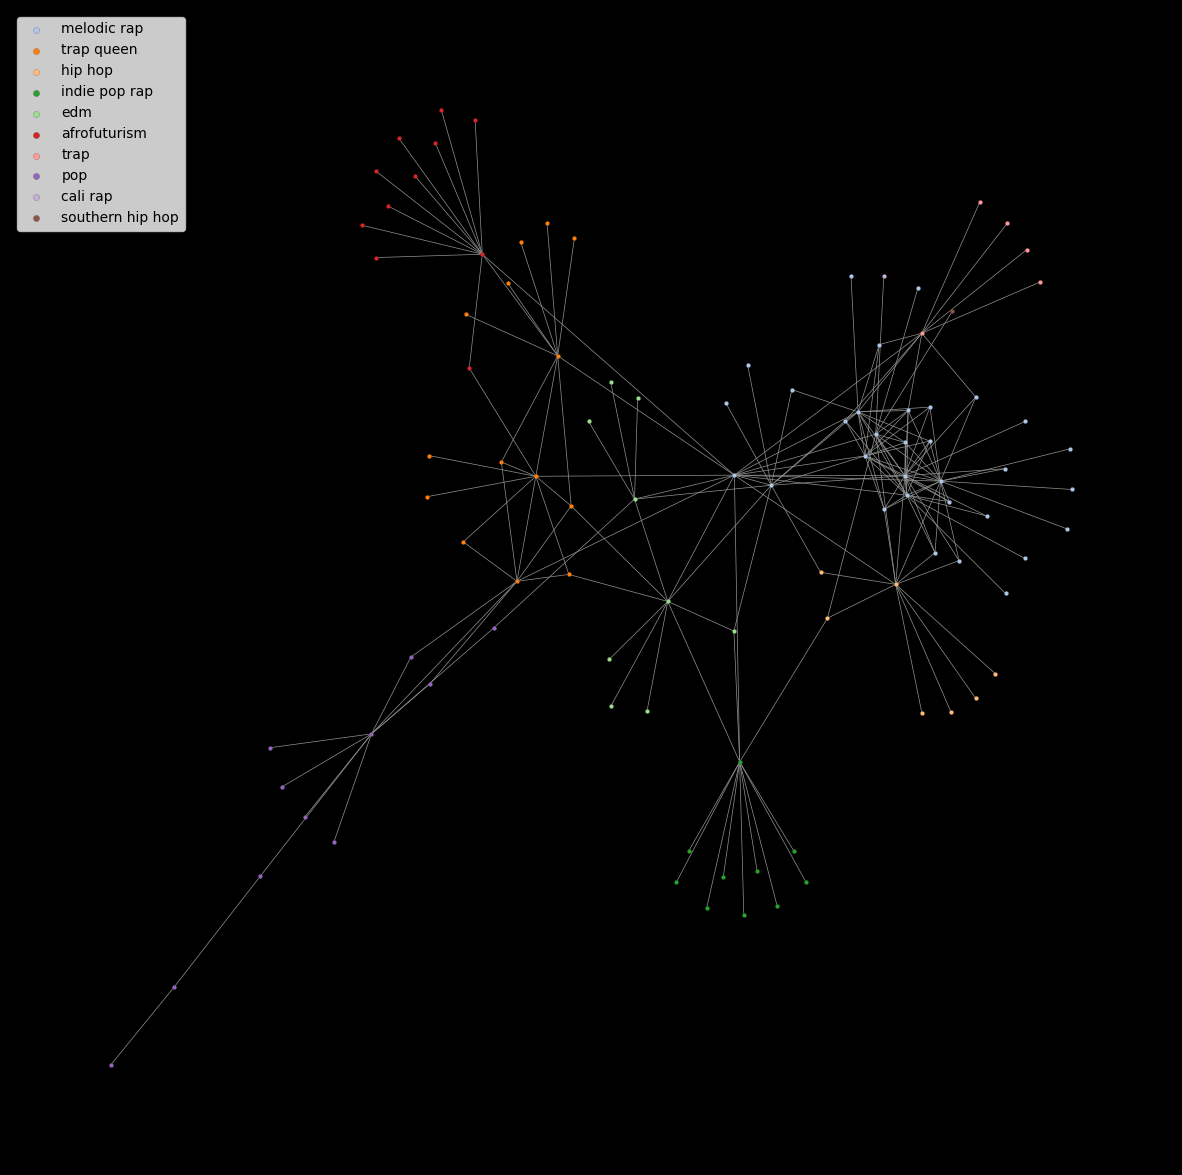

-----------------------------
Graph for year 2020
Number of nodes:  100
Number of edges:  232
Connected components:  1
Average clustering coefficient:  0.338437650498796
Arctic Monkeys modern rock
Lil Uzi Vert rap
Logic hip hop
Dua Lipa pop
Lil Wayne southern hip hop
Lil Mosey melodic rap
PARTYNEXTDOOR urban contemporary
6LACK atl hip hop
$NOT aesthetic rap
Smokepurpp miami hip hop


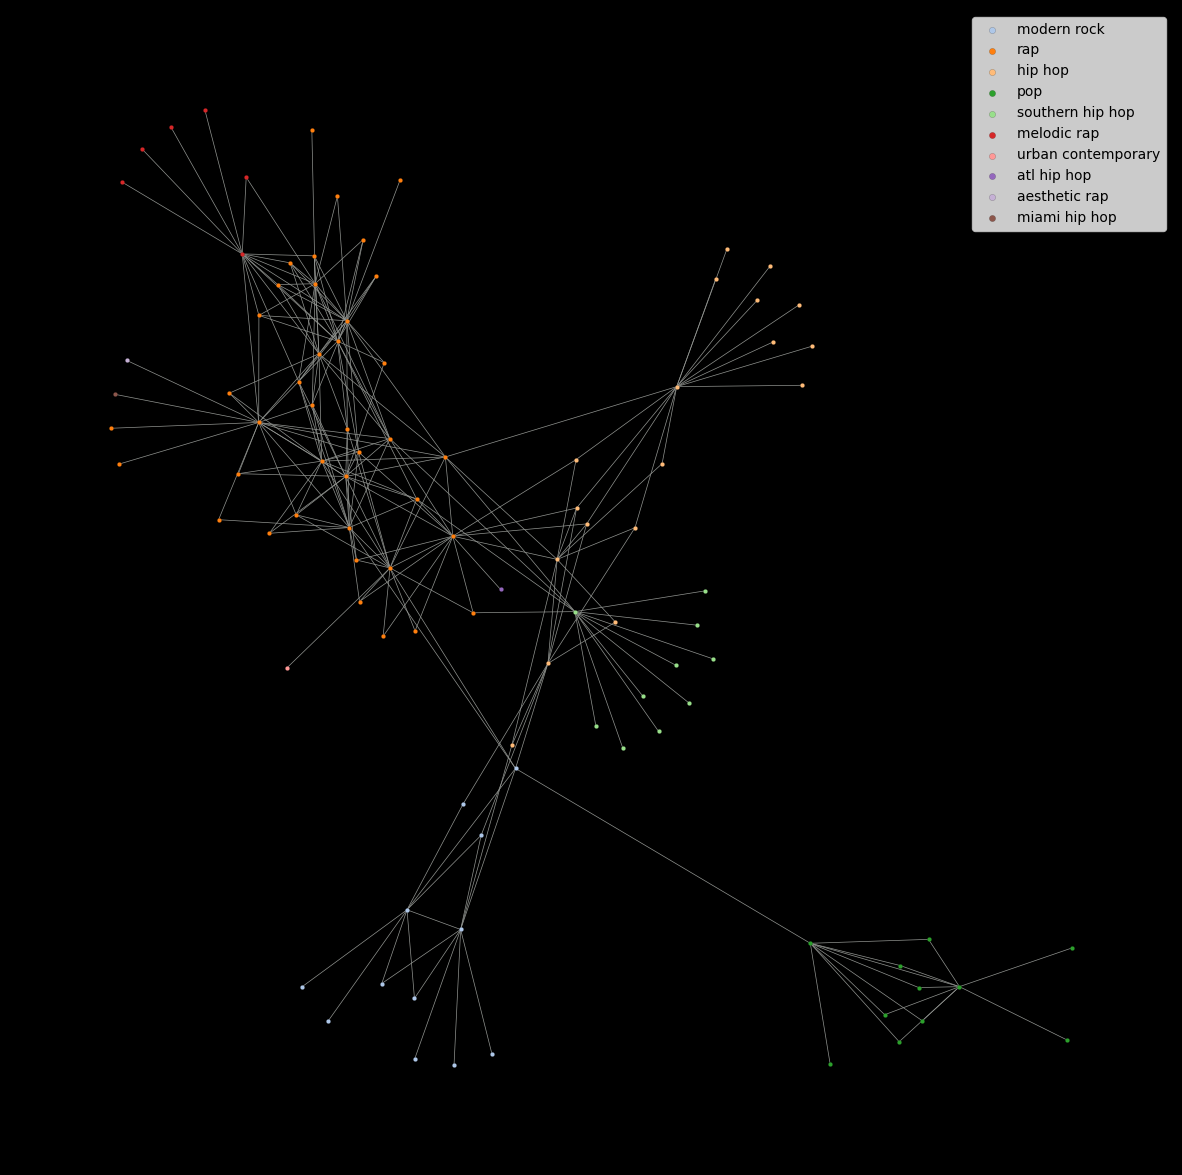

-----------------------------
Graph for year 2021
Number of nodes:  105
Number of edges:  195
Connected components:  1
Average clustering coefficient:  0.3076853305424734
Demi Lovato pop
Doja Cat r&b
Lana Del Rey pov: indie
Drake hip hop
Kanye West hip hop
Lil Tecca melodic rap
Trevor Daniel pop
Roddy Ricch trap latino
DDG florida drill
Iggy Azalea australian hip hop


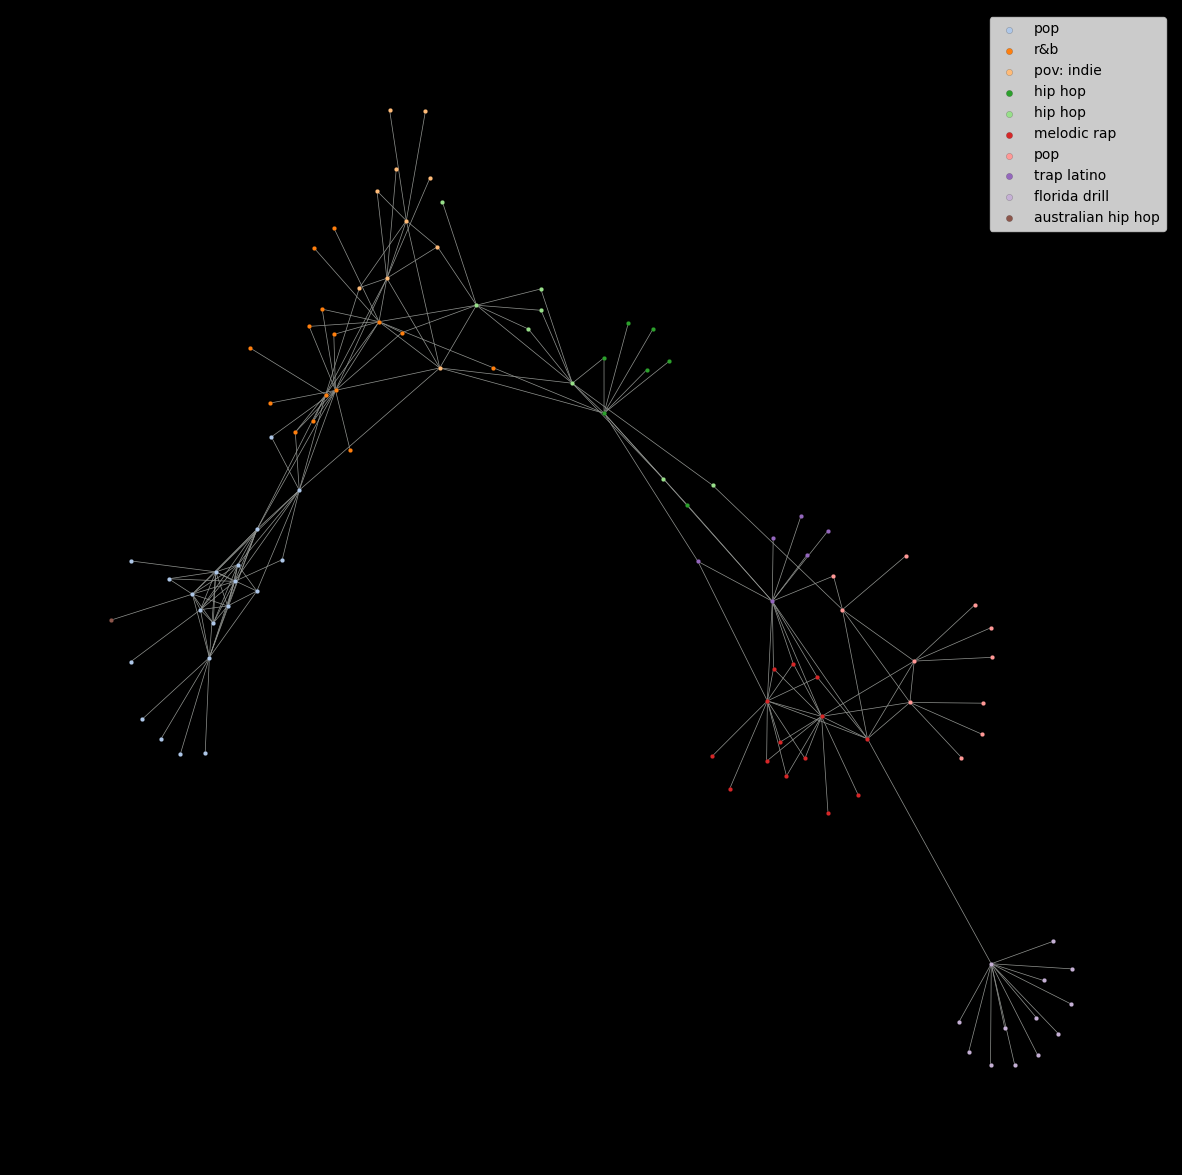

-----------------------------
Graph for year 2022
Number of nodes:  103
Number of edges:  128
Connected components:  3
Average clustering coefficient:  0.17836575506478416
Hippo Campus pov: indie
alt-J indie rock
ODESZA edm
Young the Giant folk-pop
Phantogram neo-synthpop
Sylvan Esso indie pop
Harry Styles pop
The Kid LAROI rap
Adele pop
Ed Sheeran pop


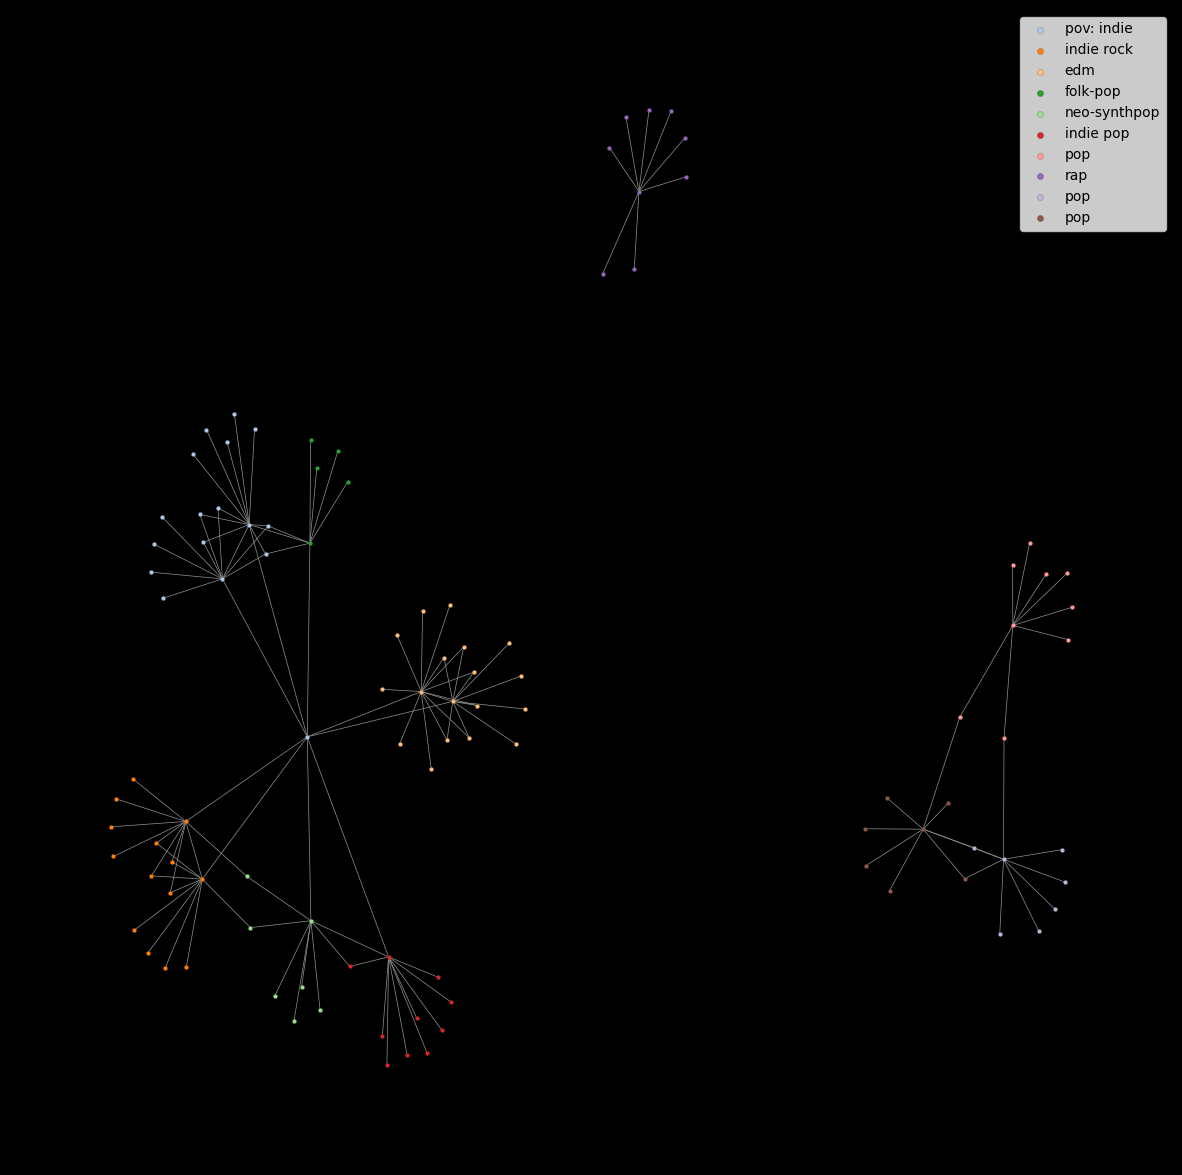

-----------------------------
Graph for year 2023
Number of nodes:  102
Number of edges:  222
Connected components:  4
Average clustering coefficient:  0.37537701469362367
Thomas Rhett country
Bailey Zimmerman modern country pop
Zach Bryan outlaw country
Parker McCollum classic texas country
Bebe Rexha pop
Jonas Brothers boy band
Taylor Swift pop
SZA rap
Metro Boomin trap
Carly Pearce country


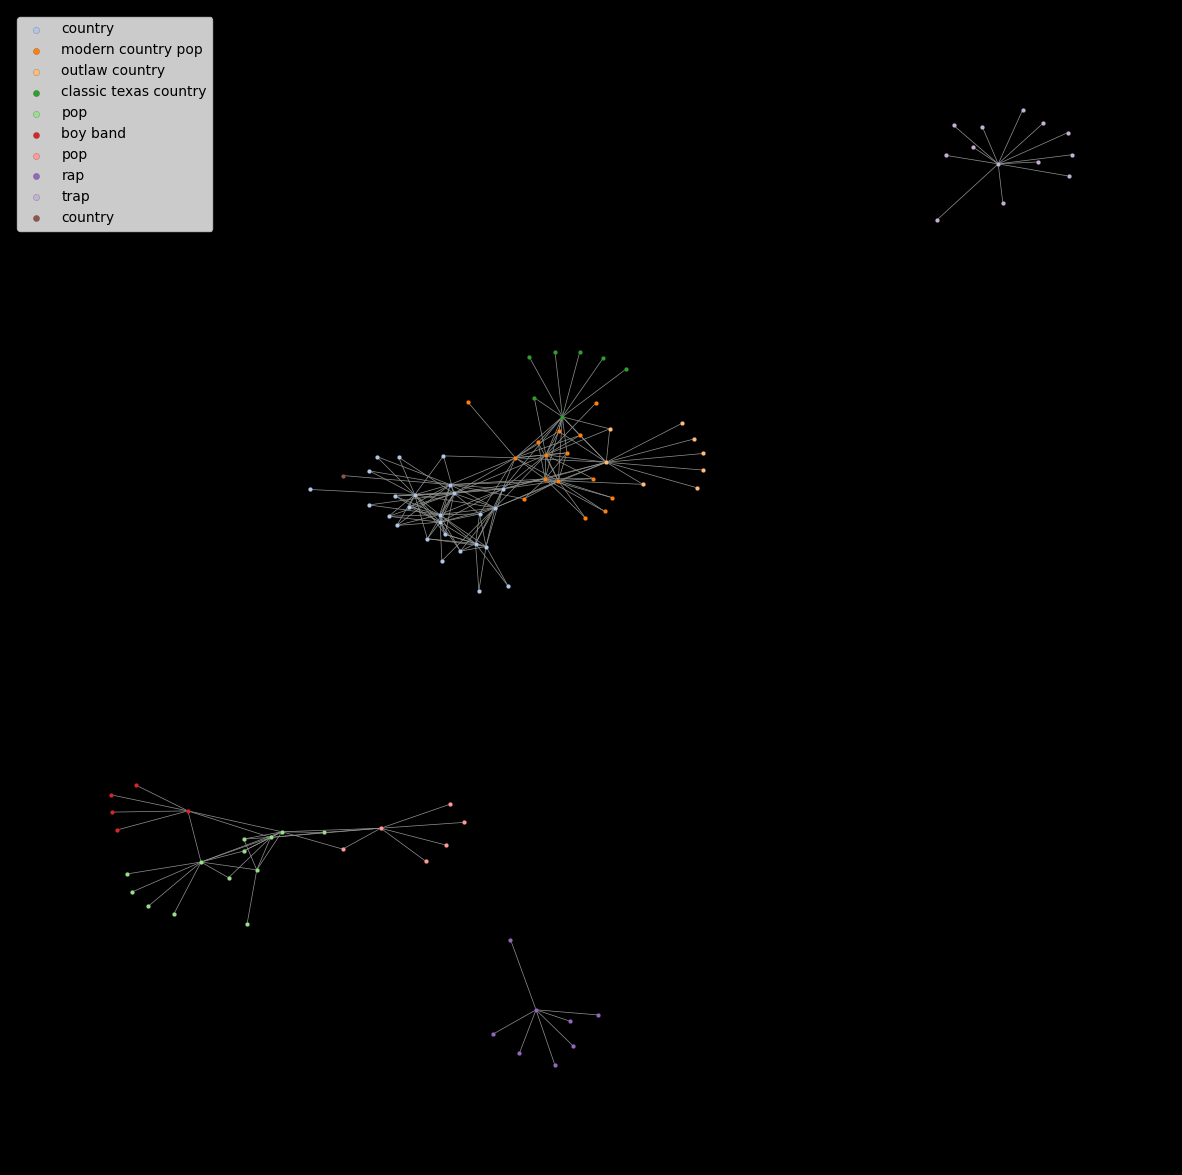

-----------------------------


In [6]:
#graphing individual year trends

#years = [2013, 2023]

for year in range(2013, 2024):
    G, artists_dict = build_graph(year, -1)
    print(f"Graph for year {year}")

    # Print basic graph properties
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())
    print("Connected components: ", nx.number_connected_components(G))
    print("Average clustering coefficient: ", nx.average_clustering(G))

    # Clusters
    num_clusters = 10 #originally 30
    #RUN WITH DIFFERENT AMOUNT OF CLUSTERS AND COMPUTE METRICS FOR THE BEST CLUSTER

    #metrics for quality clustering --> expect clusters to be tighter inside than outside
    #can check adherence between clusters/similarity between clusters
    #use unsupervised to have interesting associations, but supervised to categorize the genres (knn rather than kmeans)
    #look at top genres per year
    #not sure its temporal

    #make conclusions in addition to experiments

    #also try experiements with same set of artists in the beginning (not really about genres anymore)
    #maybe there is a part of the graph that is consistent over time

    #easiest thing is do a many clusters and few clusters to find niche clusters

    communities = partition_graph(num_clusters, G) 

    # # Compute inverse document frequencies
    idf = defaultdict(int)
    for partition in communities:
        genres = ["#".join(artists_dict[node]["genres"]) for node in partition]
        doc = "#".join(genres).replace(" ", "_").replace("#", " ")
        unique = set()
        for term in doc.split():
            if term not in unique:
                idf[term] += 1
                unique.add(term)
    idf = {k:math.log(len(communities)/v) for k, v in idf.items()}

    # Get center of each partition
    labels = {}
    cluster_labels = []
    for community in communities:
        sub = G.subgraph(list(community))
        sub_close = nx.closeness_centrality(sub)
        center = max(sub_close, key=sub_close.get)
        name = get_name(list(community), artists_dict, idf).replace("_", " ")
        labels[center] = name
        cluster_labels.append(name)
        print(artists_dict[center]["name"], name)

    #draw graph
    graph_fav_artist(G, communities, cluster_labels)
    print("-----------------------------")



Graph for years 2013-2023
Number of nodes:  668
Number of edges:  1797
Connected components:  4
Average clustering coefficient:  0.28682976756680517
Disclosure big beat
Imagine Dragons pop
Robin Thicke contemporary r&b
Hoodie Allen indie pop rap
Hucci electronic trap
Post Malone rap
Glass Animals indie rock
Alex Ubago latin pop
DDG florida drill
Morgan Wallen contemporary country


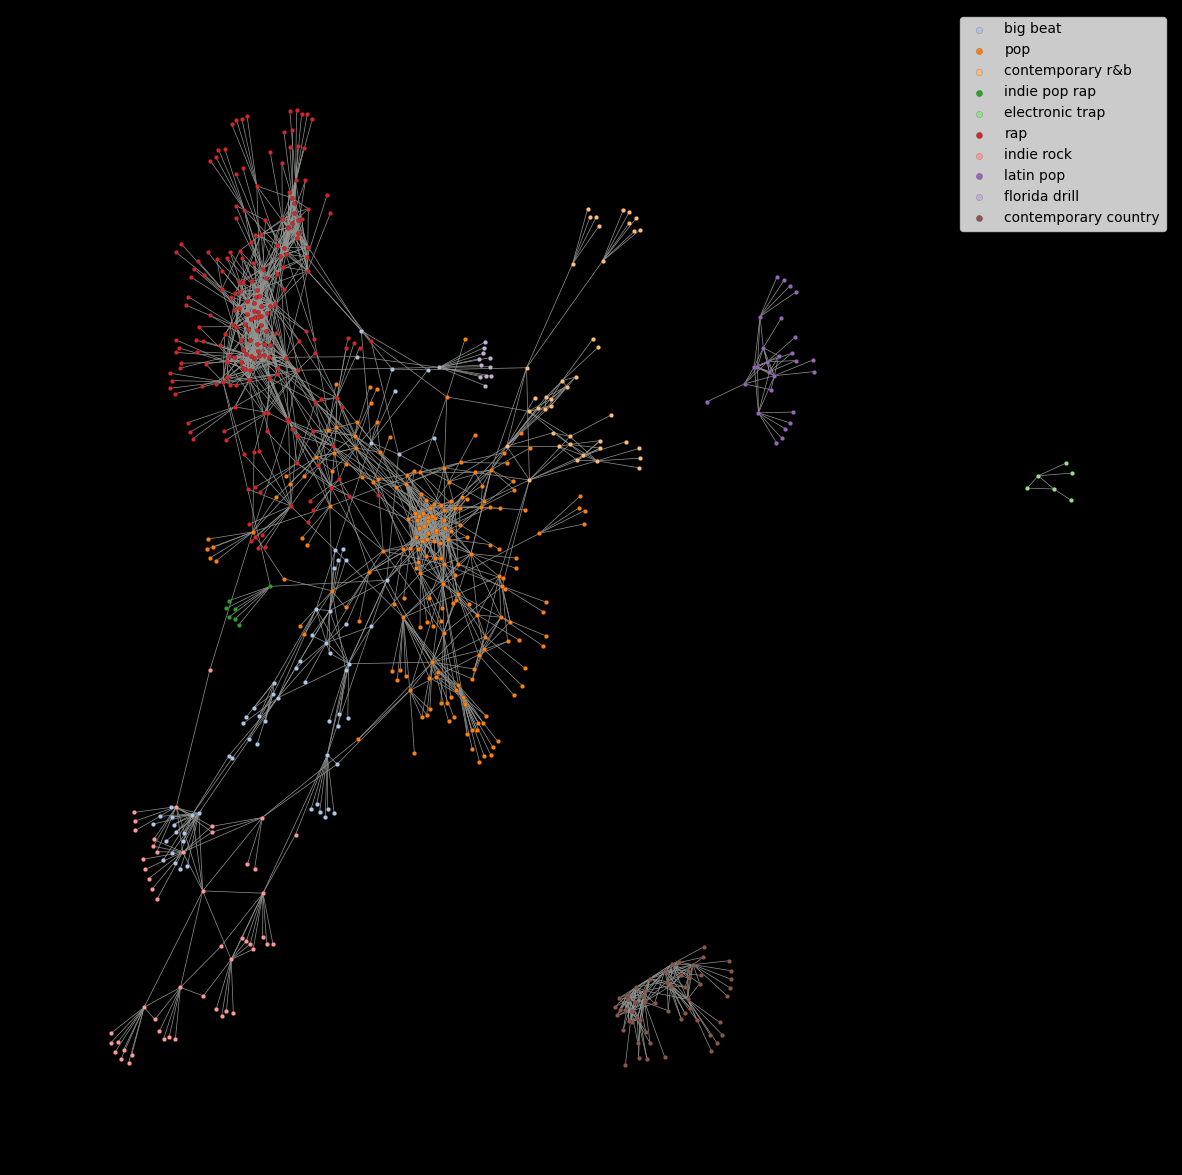

-----------------------------


In [7]:

# graphing cumulative years
# ex: 2013-2015, 2013-2023
# year_ranges = [(2013,2015),(2013,2023)]
year_ranges = [(2013,2023)]

for start_year,end_year in year_ranges:
    G, artists_dict = build_graph(start_year,end_year)
    print(f"Graph for years {start_year}-{end_year}")

    # Print basic graph properties
    print("Number of nodes: ", G.number_of_nodes())
    print("Number of edges: ", G.number_of_edges())
    print("Connected components: ", nx.number_connected_components(G))
    print("Average clustering coefficient: ", nx.average_clustering(G))

    # Clusters
    num_clusters = 10 #originally 30
    communities = partition_graph(num_clusters, G) 

    # # Compute inverse document frequencies
    idf = defaultdict(int)
    for partition in communities:
        genres = ["#".join(artists_dict[node]["genres"]) for node in partition]
        doc = "#".join(genres).replace(" ", "_").replace("#", " ")
        unique = set()
        for term in doc.split():
            if term not in unique:
                idf[term] += 1
                unique.add(term)
    idf = {k:math.log(len(communities)/v) for k, v in idf.items()}

    # Get center of each partition
    labels = {}
    cluster_labels = []
    for community in communities:
        sub = G.subgraph(list(community))
        sub_close = nx.closeness_centrality(sub)
        center = max(sub_close, key=sub_close.get)
        name = get_name(list(community), artists_dict, idf).replace("_", " ")
        labels[center] = name
        cluster_labels.append(name)
        print(artists_dict[center]["name"], name)

    #draw graph
    graph_fav_artist(G, communities, cluster_labels)
    print("-----------------------------")